In [30]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [32]:
path_root = 'malimg_data' 

In [33]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [34]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [35]:
ds, labels = next(batches)

In [36]:
ds.shape

(9339, 64, 64, 3)

In [37]:
labels.shape

(9339, 25)

In [38]:
classes = batches.class_indices.keys()

In [39]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

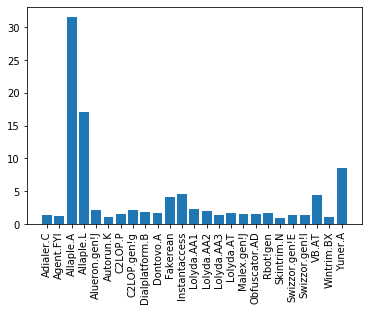

In [40]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds/255.,labels, test_size=0.3)

In [42]:
X_train.shape

(6537, 64, 64, 3)

In [43]:
X_test.shape

(2802, 64, 64, 3)

In [44]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(25,activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

In [46]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [47]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)


Epoch 1/50
205/205 [==============================] - 3s 15ms/step - loss: 1.5041 - accuracy: 0.5317 - val_loss: 0.6182 - val_accuracy: 0.7719
Epoch 2/50
205/205 [==============================] - 3s 15ms/step - loss: 0.4471 - accuracy: 0.8570 - val_loss: 0.3035 - val_accuracy: 0.9061
Epoch 3/50
205/205 [==============================] - 3s 15ms/step - loss: 0.2338 - accuracy: 0.9273 - val_loss: 0.2419 - val_accuracy: 0.9272
Epoch 4/50
205/205 [==============================] - 3s 15ms/step - loss: 0.1872 - accuracy: 0.9431 - val_loss: 0.2054 - val_accuracy: 0.9422
Epoch 5/50
205/205 [==============================] - 3s 15ms/step - loss: 0.1440 - accuracy: 0.9535 - val_loss: 0.2109 - val_accuracy: 0.9493
Epoch 6/50
205/205 [==============================] - 3s 15ms/step - loss: 0.1326 - accuracy: 0.9578 - val_loss: 0.2201 - val_accuracy: 0.9408
Epoch 7/50
205/205 [==============================] - 3s 15ms/step - loss: 0.1203 - accuracy: 0.9587 - val_loss: 0.1740 - val_accuracy: 0.9540

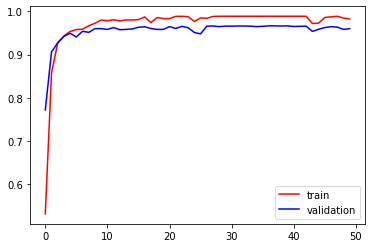

In [48]:
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue', label = 'validation')
plt.legend()
plt.show()

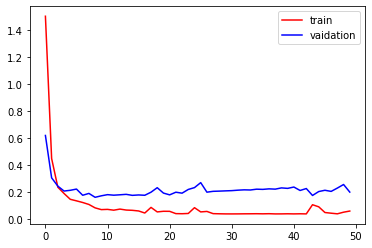

In [49]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'vaidation')
plt.legend()
plt.show()